### Script to parse security returns CSV file
#### Does not use sys and command line args

In [195]:
import numpy as np
import pandas as pd
from datetime import datetime

snp500 = pd.read_csv('SP500_GSPC_monthly.csv')
snp500.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1950-01-01,16.660000,17.090000,16.650000,17.049999,17.049999,42570000
1,1950-02-01,17.049999,17.350000,16.990000,17.219999,17.219999,33430000
2,1950-03-01,17.240000,17.610001,17.070000,17.290001,17.290001,40410000
3,1950-04-01,17.340000,18.070000,17.340000,18.070000,18.070000,48250000
4,1950-05-01,18.219999,18.780001,18.110001,18.780001,18.780001,45080000


In [196]:
snp500['Date'] = snp500['Date'].astype('datetime64[ns]')  #to convert to a pandas timestamp object
# snp500['Date'] = [time.date() for time in snp500['Date']] #to convert the pandas timestamp to a datetime.date object

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a252a4e10>],
      dtype=object)

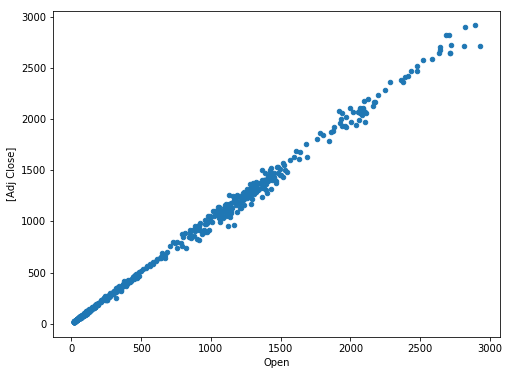

In [190]:
snp500.plot(kind='scatter', x='Open', y=['Adj Close'], subplots=True, figsize=(8,6))

In [199]:
# Uncomment and Rerun the set_index line if the CSV file is reloaded into the dataframe
# snp500.set_index( 'Date', inplace=True)
snp500['Monthly Return'] = ( snp500['Adj Close'].pct_change() ) * 100
# snp500.loc['1980-09-12']
snp500.loc['1950-12-01',:]

Open              1.966000e+01
High              2.043000e+01
Low               1.900000e+01
Close             2.041000e+01
Adj Close         2.041000e+01
Volume            6.083000e+07
Monthly Return    4.613019e+00
Name: 1950-12-01 00:00:00, dtype: float64

In [205]:
snp500['12MMA'] = snp500['Monthly Return'].rolling(window=12).mean()

In [206]:
summary = snp500.describe()

In [218]:
summary

,Open,High,Low,Close,Adj Close,Volume,Monthly Return,12MMA
count,827.000000,827.000000,827.000000,827.000000,827.000000,8.270000e+02,826.000000,815.000000
mean,564.028995,581.889009,545.701016,566.968282,566.968282,1.922686e+10,0.697096,0.700788
std,671.387011,690.157382,651.430402,674.429816,674.429816,3.188472e+10,4.100971,1.256500
min,16.660000,17.090000,16.650000,17.049999,17.049999,2.089000e+07,-21.763042,-4.618350
25%,85.134998,88.114998,83.115002,85.625000,85.625000,1.919850e+08,-1.749505,0.005742
50%,164.929993,169.619995,161.580002,166.070007,166.070007,1.923200e+09,0.909840,0.882544
75%,1089.059998,1128.489990,1042.640015,1093.224976,1093.224976,2.532264e+10,3.459089,1.521239
max,2926.290039,2940.909912,2864.120117,2913.979980,2913.979980,1.618436e+11,16.304691,3.686533


In [ ]:
snp500.to_csv( (src_csv_name.split('.'))[0]+'calculated.csv')
summary.to_csv( (src_csv_name.split('.'))[0]+'summary.csv')

In [230]:
snp500d = pd.read_csv('SP500_GSPC_daily.csv')
snp500d['Date'] = snp500d.astype( 'datetime64[ns]')
snp500d.set_index('Date', inplace=True)

price_interval = (snp500d.index[1]-snp500d.index[0])
if price_interval.days == 1:
    print('Data is on a daily basis')
elif price_interval.days in {28,29,30,31}:
    print('Data is on a monthly basis')
elif price_interval.days in {365,366}:
    print('Data is on a yearly basis')

Data is on a daily basis


In [231]:
snp500d.describe()

,Open,High,Low,Close,Adj Close,Volume
count,17336.000000,17336.000000,17336.000000,17336.000000,17336.000000,1.733600e+04
mean,565.729369,569.063398,562.198907,565.846731,565.846731,9.161165e+08
std,672.376156,675.765828,668.683436,672.449177,672.449177,1.543571e+09
min,16.660000,16.660000,16.660000,16.660000,16.660000,6.800000e+05
25%,85.804999,86.477502,85.097498,85.817499,85.817499,8.870000e+06
50%,165.870002,166.664993,164.990005,165.925003,165.925003,9.194500e+07
75%,1092.102478,1098.729981,1082.324981,1092.025025,1092.025025,1.180640e+09
max,2936.760010,2940.909912,2927.110107,2930.750000,2930.750000,1.145623e+10


In [245]:
snp500d['Daily Return'] = snp500d['Adj Close'].pct_change()*100
snp500d['Cumulative Returns'] = snp500d['Daily Return'].cumsum()
snp500d.count()

Open                  17336
High                  17336
Low                   17336
Close                 17336
Adj Close             17336
Volume                17336
Daily Return          17335
10DMA                 17326
30DMA                 17306
Cumulative Returns    17335
dtype: int64

In [246]:
snp500d.head(8)

,Open,High,Low,Close,Adj Close,Volume,Daily Return,10DMA,30DMA,Cumulative Returns
Date,,,,,,,,,,
1950-01-03,16.660000,16.660000,16.660000,16.660000,16.660000,1260000,NaN,NaN,NaN,NaN
1950-01-04,16.850000,16.850000,16.850000,16.850000,16.850000,1890000,1.140456,NaN,NaN,1.140456
1950-01-05,16.930000,16.930000,16.930000,16.930000,16.930000,2550000,0.474777,NaN,NaN,1.615234
1950-01-06,16.980000,16.980000,16.980000,16.980000,16.980000,2010000,0.295334,NaN,NaN,1.910567
1950-01-09,17.080000,17.080000,17.080000,17.080000,17.080000,2520000,0.588928,NaN,NaN,2.499496
1950-01-10,17.030001,17.030001,17.030001,17.030001,17.030001,2160000,-0.292734,NaN,NaN,2.206761
1950-01-11,17.090000,17.090000,17.090000,17.090000,17.090000,2630000,0.352314,NaN,NaN,2.559075
1950-01-12,16.760000,16.760000,16.760000,16.760000,16.760000,2970000,-1.930954,NaN,NaN,0.628121


In [247]:
snp500d['10DMA'] = snp500d['Daily Return'].rolling(window=10).mean()
snp500d['30DMA'] = snp500d['Daily Return'].rolling(window=30).mean()
snp500d.tail(5)

,Open,High,Low,Close,Adj Close,Volume,Daily Return,10DMA,30DMA,Cumulative Returns
Date,,,,,,,,,,
2018-11-15,2693.520020,2735.379883,2670.750000,2730.199951,2730.199951,4179140000,1.059375,-0.031132,-0.193207,590.380353
2018-11-16,2718.540039,2746.750000,2712.159912,2736.270020,2736.270020,3975180000,0.222331,0.054268,-0.167369,590.602683
2018-11-19,2730.739990,2733.159912,2681.090088,2690.729980,2690.729980,3772900000,-1.664311,-0.168166,-0.221529,588.938372
2018-11-20,2654.600098,2669.439941,2631.520020,2641.889893,2641.889893,4357900000,-1.815124,-0.412272,-0.277307,587.123248
2018-11-21,2657.739990,2670.729980,2649.820068,2649.929932,2649.929932,3233550000,0.304329,-0.593927,-0.157615,587.427577
